# Info
Name:  

    Explor_fuliou_DARE_single_sol

Purpose:  

    Explore the results of the single solutions calulations from Run_fuliou 
  
Input:

    none at command line
    see methods of module

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - scipy : for saving and reading
    - math
    - pdb
    - datetime
    - load_utils
  
Needed Files:

    - MOC_1solx_DARE_{vv}_{num}.mat
  
  
Modification History:

    Wrtten: Samuel LeBlanc, NASA Ames, from Santa Cruz, 2017-03-28
    Modified: 

# Load the required modules

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [106]:
import matplotlib.cm as cm

In [13]:
import numpy as np

In [2]:
fp = 'C:\\Users\\sleblan2\\Research\\Calipso\\moc\\MOCsolutions_individual\\'

In [5]:
vv = 'v1'

In [77]:
num=19373

# Load the files

In [6]:
s = sio.loadmat(fp+'MOC_1solx_DARE_{vv}_{num}.mat'.format(vv=vv,num=num))

In [7]:
s.keys()

['__version__', 'solutions', '__header__', 'select', '__globals__']

In [11]:
s['solutions'][0,0].dtype.names

('zmax',
 'dF_17lev_24hr',
 'zmin',
 'sza',
 'month',
 'swtoaup_aer_118_24hr',
 'year',
 'cosSZA',
 'swdn17lev_noaer',
 'diffusesfc_aer',
 'swdntoa_noaer',
 'AOD550',
 'swtoaup_aer_118_instant',
 'directsfc_aer',
 'lon',
 'swdn17lev_aer',
 'swup17lev_aer',
 'dF_sfc_24hr',
 'swnet17lev_noaer_118',
 'directsfc_noaer',
 'swnet17lev_aer_118',
 'dF_toa_24hr',
 'asy',
 'swdntoa_aer',
 'swuptoa_noaer',
 'pressure',
 'diffusesfc_noaer',
 'lat',
 'ssa',
 'day',
 'dF_sfc_all',
 'utc',
 'dF_17lev_all',
 'swdnsfc_aer_118_instant',
 'dF_toa_all',
 'swup17lev_noaer',
 'ext',
 'swtoaup_noaer_118_24hr',
 'swuptoa_aer')

# Format results in useable arrays

In [32]:
s['solutions'][0,1]['dF_toa_24hr'][0,0][0,0]

8.4561458333333324

In [33]:
dftoa = np.array([s['solutions'][0,i]['dF_toa_24hr'][0,0][0,0] for i in xrange(len(s['solutions'][0,:]))])

In [35]:
dfsfc = np.array([s['solutions'][0,i]['dF_sfc_24hr'][0,0] for i in xrange(len(s['solutions'][0,:]))])[:,0,0]

In [36]:
dftoa.shape

(2944L,)

In [80]:
s['select'][0,0][1]['dF_sfc_24hr'][0][0][0,0]

-32.724895833333335

In [81]:
toa_sel = {}
sfc_sel = {}
i_str = ['m1','s0','p1']
ii = 0
for ie in [-1,0,1]:
    for ia in [-1,0,1]:
        for im in [-1,0,1]:
            form = {'num':num,'e':i_str[ie+1],'a':i_str[ia+1],'s':i_str[im+1]}
            val = '{e}{a}{s}'.format(**form)
            toa_sel[val] = s['select'][0,0][ii]['dF_toa_24hr'][0][0][0,0]
            sfc_sel[val] = s['select'][0,0][ii]['dF_sfc_24hr'][0][0][0,0]
            ii += 1

In [83]:
sfc_sel.keys()

['m1m1s0',
 'm1p1s0',
 's0s0m1',
 's0m1p1',
 'p1m1s0',
 's0s0s0',
 'm1s0s0',
 'm1m1p1',
 'm1s0p1',
 's0m1m1',
 'p1s0s0',
 'p1s0m1',
 's0p1s0',
 'p1m1m1',
 's0m1s0',
 'p1p1s0',
 'p1p1p1',
 'p1m1p1',
 'm1p1p1',
 'm1s0m1',
 'm1m1m1',
 'm1p1m1',
 's0p1m1',
 'p1s0p1',
 'p1p1m1',
 's0s0p1',
 's0p1p1']

# Start to plot out results

In [37]:
dftoa

array([ 8.25467014,  8.45614583,  8.01206597, ..., -3.38553819,
       -3.28255208, -3.17788194])

<IPython.core.display.Javascript object>


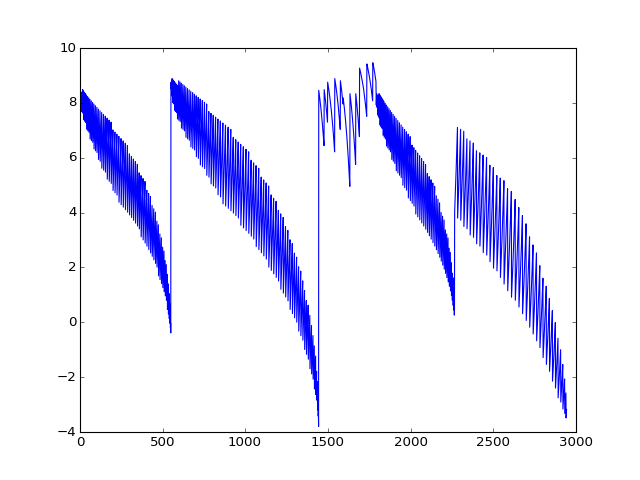

In [38]:
plt.figure()
plt.plot(dftoa)

In [118]:
a = cm.hsv(np.arange(10))

In [125]:
cs = cm.hsv(np.arange(27)/27.0)

In [126]:
for i,k in enumerate(toa_sel.keys()):
    print tuple(cs[i,:])

(1.0, 0.0, 0.0, 1.0)
(1.0, 0.20845609080903196, 0.0, 1.0)
(1.0, 0.41691218161806393, 0.0, 1.0)
(1.0, 0.64853006029476612, 0.0, 1.0)
(1.0, 0.85698615110379794, 0.0, 1.0)
(0.9113959702194997, 1.0, 0.0, 1.0)
(0.70293987941046776, 1.0, 0.0, 1.0)
(0.47132200073376579, 1.0, 0.0, 1.0)
(0.26286590992473358, 1.0, 0.0, 1.0)
(0.03124934374934376, 1.0, 1.3125013124790507e-06, 1.0)
(0.0, 1.0, 0.17720733690405541, 1.0)
(0.0, 1.0, 0.40882375639585572, 1.0)
(0.0, 1.0, 0.61727853393847598, 1.0)
(0.0, 1.0, 0.84889495343027632, 1.0)
(0.0, 0.94264990772343771, 1.0, 1.0)
(0.0, 0.7110320290467349, 1.0, 1.0)
(0.0, 0.50257593823770308, 1.0, 1.0)
(0.0, 0.27095805956100094, 1.0, 1.0)
(0.0, 0.062501968751969006, 1.0, 1.0)
(0.16911590992473247, 0.0, 1.0, 1.0)
(0.37757200073376529, 0.0, 1.0, 1.0)
(0.60918987941046776, 0.0, 1.0, 1.0)
(0.81764597021949992, 0.0, 1.0, 1.0)
(0.99558794963206743, 0.0, 0.94632410073586526, 1.0)
(1.0, 0.0, 0.74228006029476601, 1.0)
(1.0, 0.0, 0.51066218161806387, 1.0)
(1.0, 0.0, 0.3022060

<IPython.core.display.Javascript object>


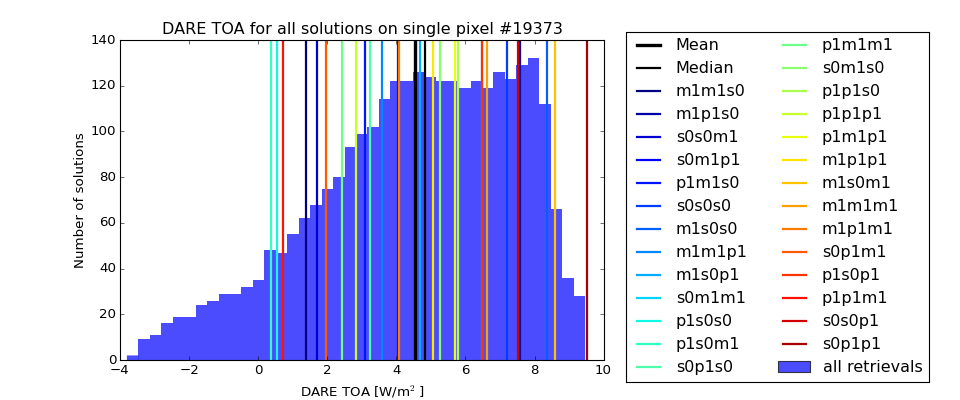

In [127]:
plt.figure(figsize=(12,5))
plt.hist(dftoa,bins=40,alpha=0.7,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dftoa),color='k',lw=3,label='Mean')
plt.axvline(np.median(dftoa),color='k',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
for i,k in enumerate(toa_sel.keys()):
    plt.axvline(toa_sel[k],lw=2,label=k,color=tuple(cs[i,:]))

plt.xlabel('DARE TOA [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE TOA for all solutions on single pixel #{}'.format(num))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.05),loc=2,ncol=2)